## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


## Data Description

In [5]:
milk= pd.read_csv('milknew.csv')

In [6]:
milk.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [7]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [8]:
milk.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [9]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [10]:
print(milk.isnull().sum())
#we have seen that there is no need to clear or fill the data for null values

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [11]:
#we have fixed the unnecessary blanks in our key names

print(milk.columns)
milk.columns= (['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'])


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


<AxesSubplot:>

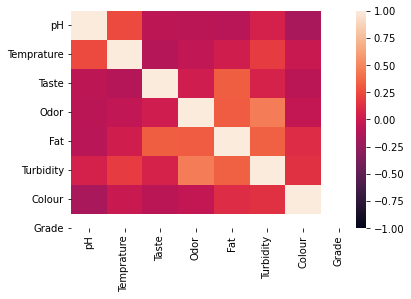

In [12]:
sns.heatmap(milk.corr(), xticklabels=milk.columns, yticklabels=milk.columns,vmin=-1)

<AxesSubplot:xlabel='Grade', ylabel='pH'>

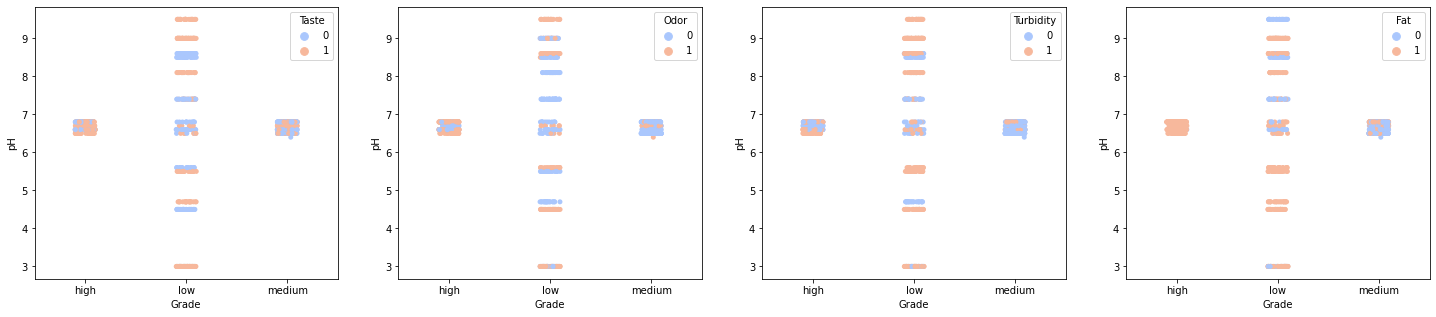

In [13]:
fig=plt.figure(figsize=(25,5))
x1=fig.add_subplot(1,4,1)
x2=fig.add_subplot(1,4,2)
x3=fig.add_subplot(1,4,3)
x4=fig.add_subplot(1,4,4)
sns.stripplot(x= "Grade", y="pH", hue='Taste', data=milk, palette="coolwarm", ax=x1)
sns.stripplot(x= "Grade", y="pH", hue='Odor', data=milk, palette="coolwarm", ax=x2)
sns.stripplot(x= "Grade", y="pH", hue='Turbidity', data=milk, palette="coolwarm", ax=x3)
sns.stripplot(x= "Grade", y="pH", hue='Fat', data=milk, palette="coolwarm", ax=x4)


<AxesSubplot:xlabel='Colour', ylabel='Grade'>

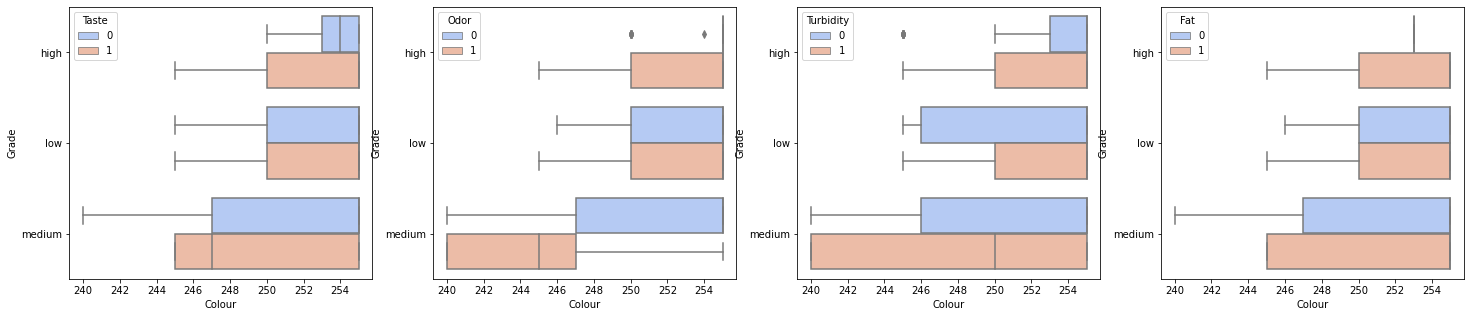

In [14]:
fig=plt.figure(figsize=(25,5))
x1=fig.add_subplot(1,4,1)
x2=fig.add_subplot(1,4,2)
x3=fig.add_subplot(1,4,3)
x4=fig.add_subplot(1,4,4)
sns.boxplot(x= "Colour", y="Grade", hue='Taste', data=milk, palette="coolwarm", ax=x1)
sns.boxplot(x= "Colour", y="Grade", hue='Odor', data=milk, palette="coolwarm", ax=x2)
sns.boxplot(x= "Colour", y="Grade", hue='Turbidity', data=milk, palette="coolwarm", ax=x3)
sns.boxplot(x= "Colour", y="Grade", hue='Fat', data=milk, palette="coolwarm", ax=x4)

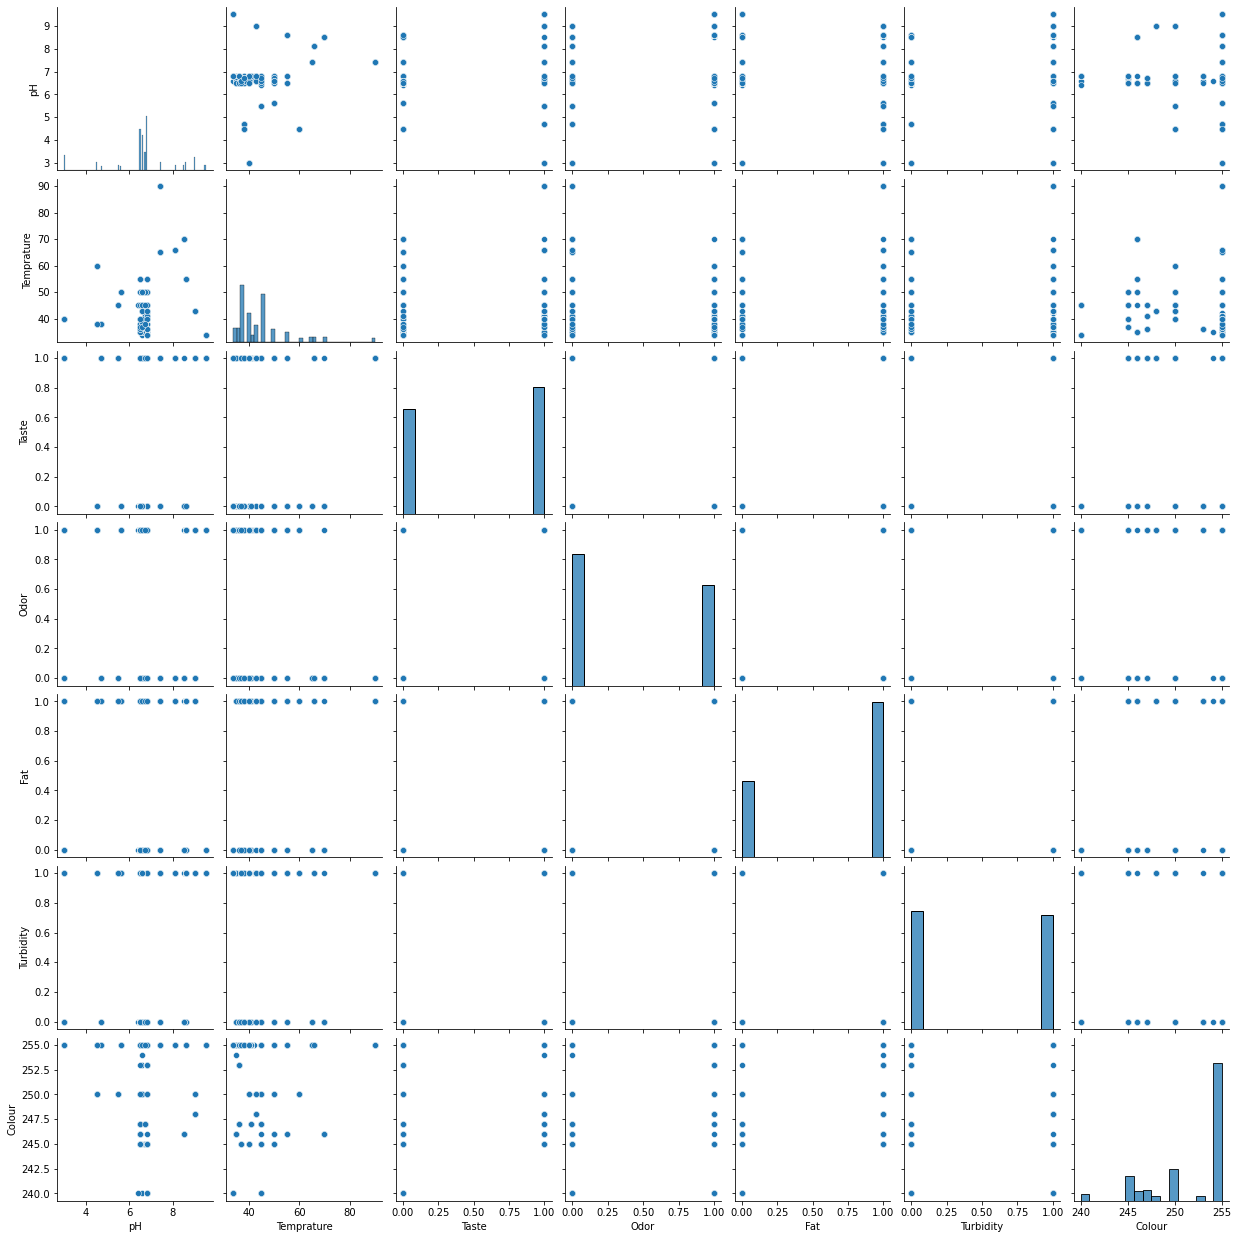

In [15]:
sns.pairplot(milk)


###  Train Test Spliting


In [16]:
encoder= preprocessing.LabelEncoder()
#for our machine learning model to work properly we assigned dummy variables for our grade labels
#Grade=0 : high
#Grade=1 : low
#Grade=2 : medium

In [17]:
milk["Grade"]= encoder.fit_transform(milk["Grade"])

In [18]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [19]:
X=milk.drop(["Grade"], axis=1)

In [20]:
y=milk["Grade"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
print("Original Data:",milk.shape)
print("Train Data:", X_train.shape)
print("Test Data:", X_test.shape)

Original Data: (1059, 8)
Train Data: (847, 7)
Test Data: (212, 7)


## BestSubset

In [23]:
import mlxtend

In [24]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [25]:
logmodel=LogisticRegression(max_iter=1000, penalty="none")

In [26]:
efs=EFS(logmodel, min_features=1, max_features=7, cv=5, scoring="accuracy", print_progress=True)

In [27]:
feature_names= ('pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour')

In [28]:
efs=efs.fit(X_train, y_train)

Features: 127/127

In [63]:
EFS_Results= efs.best_score_
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

Best accuracy score: 0.79
Best subset (indices): (0, 1, 2, 3, 4, 6)
Best subset (corresponding names): ('pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Colour')


In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(logmodel, 
           k_features=7, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)
feature_names= ('pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour')
sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2022-10-10 21:44:22] Features: 1/7 -- score: 0.5939227288548555[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2022-10-10 21:44:22] Features: 2/7 -- score: 0.6717577445179256[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished

[2022-10-10 21:44:23] Features: 3/7 -- score: 0.685972850678733[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       penalty='none'),
                          k_features=(7, 7), scoring='accuracy', verbose=2)

In [32]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.5294117647058824, 0.6058823529411764, 0.615...",0.593923,"(Turbidity,)",0.041919,0.032615,0.016307
2,"(1, 5)","[0.7, 0.6647058823529411, 0.6627218934911243, ...",0.671758,"(Temprature, Turbidity)",0.018361,0.014285,0.007143
3,"(0, 1, 5)","[0.7294117647058823, 0.6235294117647059, 0.721...",0.685973,"(pH, Temprature, Turbidity)",0.051659,0.040193,0.020096
4,"(0, 1, 5, 6)","[0.7294117647058823, 0.6294117647058823, 0.733...",0.683599,"(pH, Temprature, Turbidity, Colour)",0.053613,0.041713,0.020856
5,"(0, 1, 2, 5, 6)","[0.7235294117647059, 0.7352941176470589, 0.733...",0.741469,"(pH, Temprature, Taste, Turbidity, Colour)",0.022684,0.017649,0.008825
6,"(0, 1, 2, 3, 5, 6)","[0.7470588235294118, 0.7529411764705882, 0.775...",0.749704,"(pH, Temprature, Taste, Odor, Turbidity, Colour)",0.028287,0.022008,0.011004
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7235294117647059, 0.7176470588235294, 0.751...",0.734389,"(pH, Temprature, Taste, Odor, Fat, Turbidity, ...",0.024829,0.019318,0.009659


In [33]:
logmodel=LogisticRegression(max_iter=1000)
X_train_selected=X_train.iloc[:,[0, 1, 2, 3, 5, 6]]
X_test_selected=X_test.iloc[:,[0, 1, 2, 3, 5, 6]]
logmodel.fit(X_train_selected, y_train)
score = logmodel.score(X_test_selected, y_test)
print(score)

0.6792452830188679


##### We will choose the results from the EFS model as our new features. Our choice did not just based on the accuracy difference between the models but also its based on the research that we did on the quality parameters of the milk. Fat has an important effect while determining the quality of the milk, however SFS model drops the fat feature. 

## Decision Tree Classifier Method with KFold Validation

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
classifier= DecisionTreeClassifier()

In [39]:
pruning = classifier.cost_complexity_pruning_path(X_train, y_train)

In order to find the Decision Tree Method with best ccp alpha values we will write a for loop and try to pick the best value.

In [40]:
cv=KFold(n_splits=10, random_state=10, shuffle=True ) 

In [41]:
Decision_Tree_Errs= []

In [42]:
for i in pruning.ccp_alphas:
     for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid= X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        classifier = DecisionTreeClassifier(ccp_alpha=i)
        classifier.fit(X_trainp, y_trainp)
        y_pred=classifier.predict(X_valid)
        Decision_Tree_Errs.append([i, accuracy_score(y_trainp,classifier.predict(X_trainp)), accuracy_score(y_valid, y_pred)])
        
df = pd.DataFrame(Decision_Tree_Errs,columns=['Alpha Value','Training Accuracy','Validation Accuracy'])
Dec_T_alpha = df.groupby('Alpha Value')
Dec_T_alpha = Dec_T_alpha.mean()
Dec_T_alpha = Dec_T_alpha.reset_index()
Dec_T_alpha

,Alpha Value,Training Accuracy,Validation Accuracy
0,0.000000,1.000000,0.995280
1,0.001172,1.000000,0.995280
2,0.001174,1.000000,0.995280
3,0.002267,0.997770,0.992927
4,0.002318,0.997770,0.992927
5,0.002938,0.993835,0.990560
6,0.011257,0.983471,0.978782
7,0.032808,0.906601,0.880770
8,0.036271,0.887709,0.864272
9,0.073908,0.844291,0.819384


In [43]:
Dec_T_alpha=Dec_T_alpha.sort_values(by="Validation Accuracy", ascending=False) ;Dec_T_alpha.tail

<bound method NDFrame.tail of     Alpha Value  Training Accuracy  Validation Accuracy
0      0.000000           1.000000             0.995280
1      0.001172           1.000000             0.995280
2      0.001174           1.000000             0.995280
3      0.002267           0.997770             0.992927
4      0.002318           0.997770             0.992927
5      0.002938           0.993835             0.990560
6      0.011257           0.983471             0.978782
7      0.032808           0.906601             0.880770
8      0.036271           0.887709             0.864272
9      0.073908           0.844291             0.819384
10     0.098999           0.782643             0.741232
11     0.151169           0.558986             0.559426>

In [44]:
print("alpha value with best accuracy: 0.002267")

alpha value with best accuracy: 0.002267


In [45]:
classifier= DecisionTreeClassifier(ccp_alpha=0.002267)

In [46]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002267)

In [47]:
X_train.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour'], dtype='object')

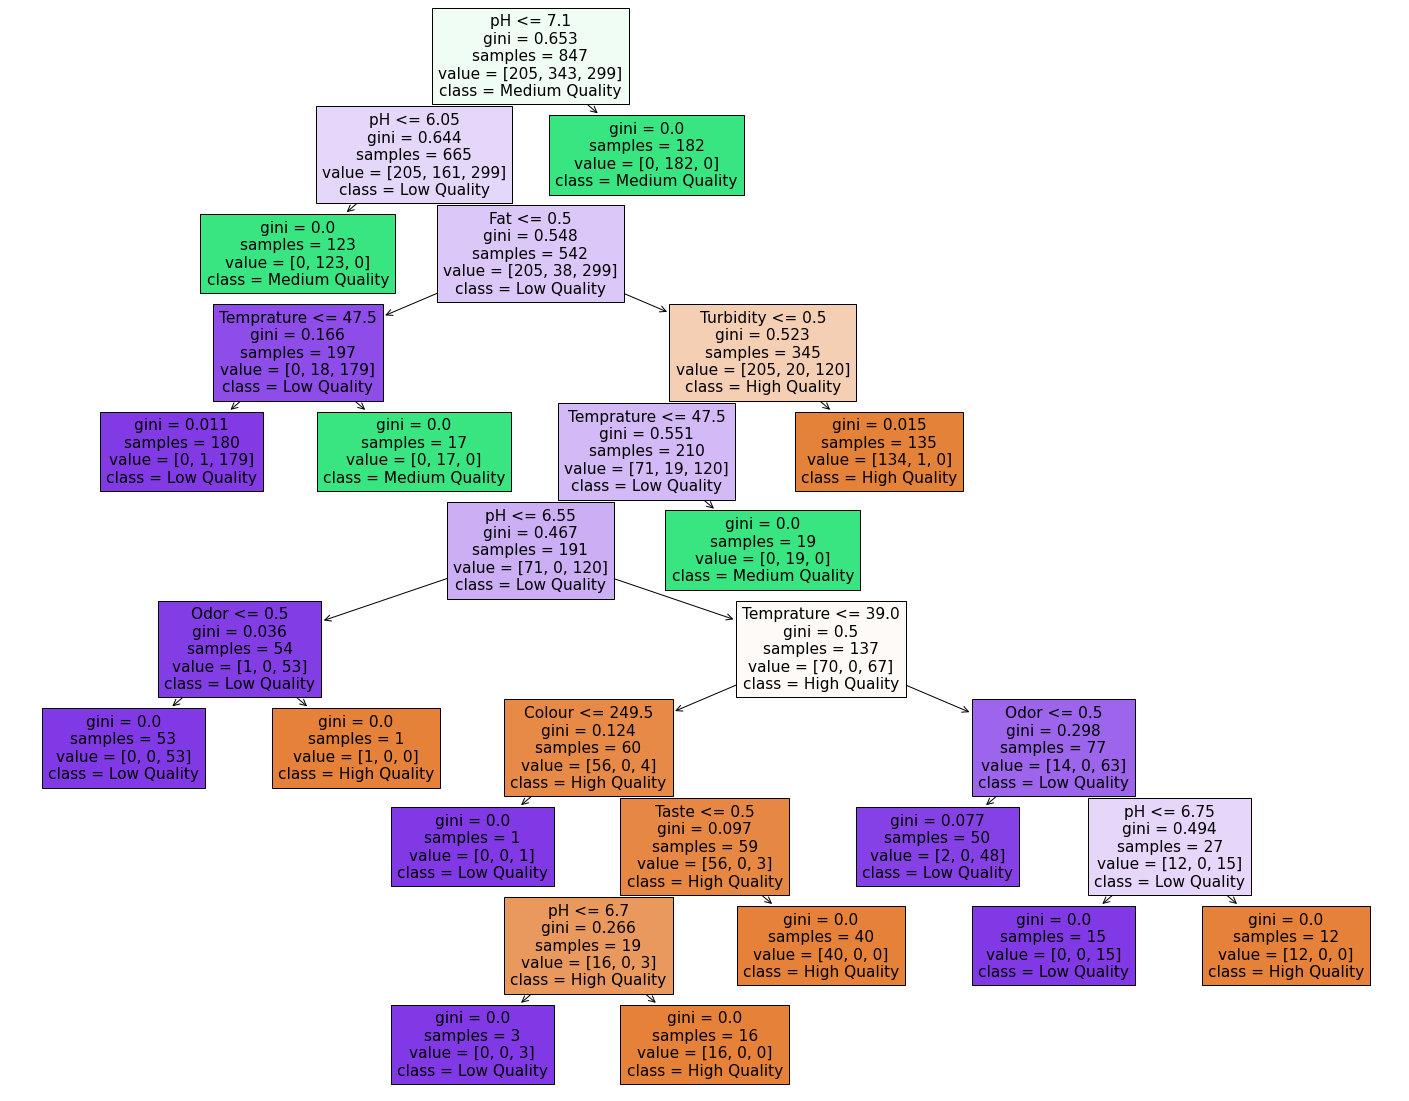

In [48]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, class_names=['High Quality',"Medium Quality",'Low Quality'],feature_names=['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour'], filled=True)

In [76]:
y_pred = classifier.predict(X_test)
Decision_Tree_Results= accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.9764150943396226


##  Classification with Random Forests

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [85]:
rfc= RandomForestClassifier(random_state=0)

In [86]:
st= (np.array(np.linspace(100,600,6))).tolist()
n_esitmators= [int(i) for i in st]
max_features= [1,2,3,4,5,6,7]
params={ "n_estimators":n_esitmators , "max_features":max_features}

In [87]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_test = y.iloc[train_index], y.iloc[validation_index]
    rfc_with_grid= GridSearchCV(estimator=rfc, param_grid=params, cv=5, verbose=2, scoring="accuracy")
    rfc_with_grid.fit(X_train, y_train)
    print(rfc_with_grid.best_params_)
    rfc=RandomForestClassifier(**rfc_with_grid.best_params_)
    rfc.fit(X_train,y_train)
    y_pred=rfc.predict(X_test)
    #Test the performance on the test set
    CVErrors.append(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=1, n_e

[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=4, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=4, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=4, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=4, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=4, n_estimators=500; total time=   0.4s
[CV] END ...................max_features=4, n_estimators=500; total time=   0.4s
[CV] END ...................max_features=4, n_estimators=500; total time=   0.4s
[CV] END ...................

[CV] END ...................max_features=7, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=7, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=7, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=7, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=7, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=7, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=7, n_estimators=600; total time=   0.6s
{'max_features': 1, 'n_estimators': 100}
Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.0s
[CV] E

[CV] END ...................max_features=4, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=4, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=4, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=4, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=4, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=4, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=4, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=4, n_estimators=300; total time=   0.2s
[CV] END ...................

[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=7, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=7, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=7, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=7, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=7, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=7, n_estimators=600; total time=   0.6s
[CV] END ...................

[CV] END ...................max_features=3, n_estimators=600; total time=   0.5s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.5s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.5s
[CV] END ...................max_features=4, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=4, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=4, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=4, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=4, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=4, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=4, n_estimators=200; total time=   0.1s
[CV] END ...................

[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=300; total time=   0.3s
[CV] END ...................max_features=7, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=7, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=7, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=7, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................max_features=7, n_estimators=400; total time=   0.4s
[CV] END ...................

[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=500; total time=   0.4s
[CV] END ...................max_features=3, n_estimators=500; total time=   0.4s
[CV] END ...................max_features=3, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=3, n_estimators=500; total time=   0.4s
[CV] END ...................max_features=3, n_estimators=500; total time=   0.4s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.5s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.5s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=3, n_estimators=600; total time=   0.6s
[CV] END ...................

[CV] END ...................max_features=6, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=7, n_estimators=300; total time=   0.2s
[CV] END ...................

[CV] END ...................max_features=3, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=3, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=3, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=3, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=3, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=3, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=400; total time=   0.3s
[CV] END ...................max_features=3, n_estimators=500; total time=   0.4s
[CV] END ...................

[CV] END ...................max_features=6, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=6, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=6, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=6, n_estimators=500; total time=   0.5s
[CV] END ...................max_features=6, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=6, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=6, n_estimators=600; total time=   0.7s
[CV] END ...................max_features=6, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=6, n_estimators=600; total time=   0.6s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=7, n_estimators=100; total time=   0.0s
[CV] END ...................

In [88]:
Random_Forest_Results=np.mean(CVErrors); Random_Forest_Results

0.9981132075471699

In [89]:
rfc.feature_importances_

array([0.3477606 , 0.26524048, 0.04126646, 0.07887656, 0.08585237,
       0.08975967, 0.09124385])

In [90]:
feats = {}
importances = rfc.feature_importances_
rfc.feature_importances_

array([0.3477606 , 0.26524048, 0.04126646, 0.07887656, 0.08585237,
       0.08975967, 0.09124385])

<AxesSubplot:>

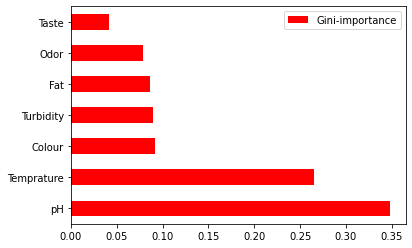

In [91]:
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')

## Classification model with Extreme Gradient Boosting 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [81]:
lst= (np.array(np.linspace(10,100,10))).tolist()
XGB = XGBClassifier()
n_estimators = [int(i) for i in lst]
learning_rate = (np.array(np.linspace(0,1,100)*10**-1)).tolist()
params = {'n_estimators': n_estimators,'learning_rate': learning_rate,}
boost_grid = GridSearchCV(estimator = XGB, param_grid = params, cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)

boost_grid.fit(X_train, y_train)
print(boost_grid.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
{'learning_rate': 0.041414141414141424, 'n_estimators': 100}


In [82]:
XGB=XGBClassifier(n_estimators=100,learning_rate=0.041414141414141424)
XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)
XGB_Results= accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9905660377358491


### Results

In [80]:
print('EFS Results:', EFS_Results)
print('Decision Tree Results:', Decision_Tree_Results)
print('Random Forests Results:', Random_Forest_Results)
print('Extreme Gradient Boosting Results:', XGB_Results)


EFS Results: 0.7886529759832928
Decision Tree Results: 0.9764150943396226
Random Forests Results: 0.9981132075471699
Extreme Gradient Boosting Results: 0.9905660377358491


### We have seen that the Random Forests Model yields the best results for our test data. 

## Thank you.